### Does the same EDA as "Numpy_tests" but for the data files with a "_3" subscript

In [22]:
import sys
sys.path.append('../InputData/')
from ParseCalib import read_calib_file
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from py_ang import py_ang
plt.style.use('../styles/helvet2dark.mplstyle')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = read_calib_file('../data/calib3.dat')

In [3]:
df.head()

,Temp,qi01,qi02,qi03,qi04,qi05,qi06,qi07,qi08,qi09,...,vcmxf2,vcmyf2,vcmzf2,dcolf,mangxf1,mangyf1,mangzf1,mangxf2,mangyf2,mangzf2
ID,,,,,,,,,,,,,,,,,,,,,
500001,10.0,0.123737,-3.665007,0.358154,-0.123737,-3.299180,-0.358154,0.085994,3.236029,0.263250,...,-0.000115,-0.001766,-0.017285,7.107554,-0.001333,0.000298,0.000709,-0.001413,0.000143,0.000906
500002,10.0,-0.162479,-3.578801,-0.035046,0.162479,-4.146284,0.035046,-0.389997,4.015099,-0.127386,...,-0.000035,-0.000245,-0.045222,7.728730,-0.000055,0.000021,0.000546,0.000005,0.000012,-0.000002
500003,10.0,0.134875,-1.861337,0.343628,-0.134875,-2.293239,-0.343628,-0.250974,1.999965,0.306252,...,0.000250,0.010454,-0.016176,4.299312,0.000144,-0.000070,-0.000246,-0.002918,-0.000428,-0.002649
500004,10.0,0.083603,-3.037833,0.132645,-0.083603,-3.626661,-0.132645,-0.060392,3.214813,-0.397379,...,0.000090,-0.001727,-0.035157,6.643401,0.002461,0.000265,-0.001094,0.000723,0.000065,-0.000127
500005,10.0,-0.018947,-0.552252,0.079245,0.018947,0.068335,-0.079245,0.303439,0.404606,-0.018483,...,-0.000528,0.001866,0.004836,0.828373,0.000819,-0.000147,-0.004079,0.006734,-0.006845,0.006264


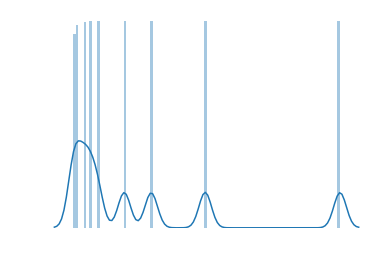

In [4]:
sns.distplot(df.Temp, bins = 100)
#sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

In [5]:
df.Temp.unique()

array([  10.,   20.,   50.,   70.,  100.,  200.,  300.,  500., 1000.])

In [6]:
tc = pd.Categorical(df.Temp.unique())

In [7]:
clrs = {10.0:'C0', 20.0:'C1', 50.0:'C2', 70.0:'C3', 100.0:'C4', 200.0:'C5', 300.0:'C6', 500.0:'C7', 1000.0:'C8'}

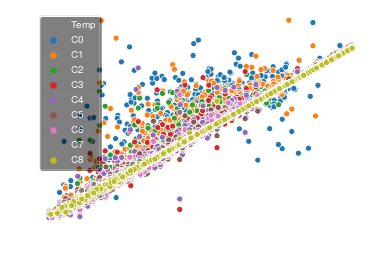

In [8]:
sns.scatterplot(x="dcoli", y="dcolf", hue=df['Temp'].apply(lambda x: clrs[x]), data=df)
plt.show()

In [12]:
vcmi1 = np.linalg.norm((df.vcmxi1,df.vcmyi1,df.vcmzi1), ord=2, axis=0)
vcmf1 = np.linalg.norm((df.vcmxf1,df.vcmyf1,df.vcmzf1), ord=2, axis=0)

In [13]:
vcmi2 = np.linalg.norm((df.vcmxi2,df.vcmyi2,df.vcmzi2), ord=2, axis=0)
vcmf2 = np.linalg.norm((df.vcmxf2,df.vcmyf2,df.vcmzf2), ord=2, axis=0)

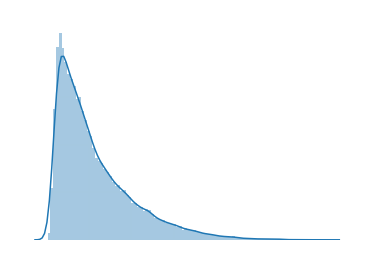

In [14]:
sns.distplot(vcmi1, bins=100)
plt.title('Vcmi1')
plt.show()

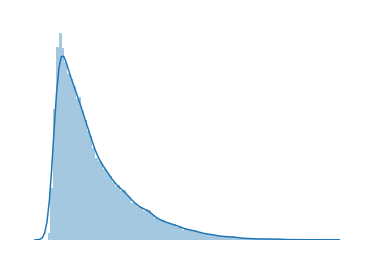

In [15]:
sns.distplot(vcmi2, bins=100)
plt.title('Vcmi2')
plt.show()

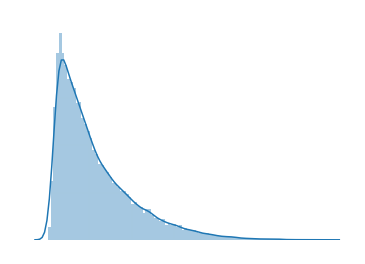

In [16]:
sns.distplot(vcmf1, bins=100)
plt.title('Vcmf1')
plt.show()

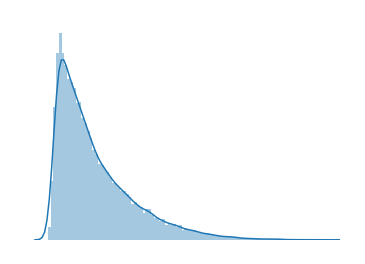

In [17]:
sns.distplot(vcmf2, bins=100)
plt.title('Vcmf2')
plt.show()

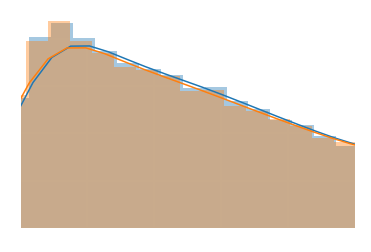

In [18]:
sns.distplot(vcmi2, bins=100)
sns.distplot(vcmf2, bins=100)
plt.xlim(0.02, 0.12)
plt.show()

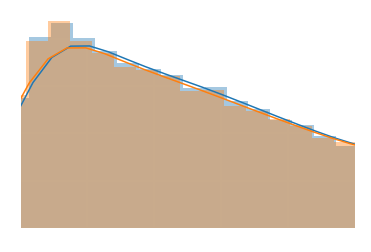

In [19]:
sns.distplot(vcmi2, bins=100)
sns.distplot(vcmf2, bins=100)
plt.xlim(0.02, 0.12)
plt.show()

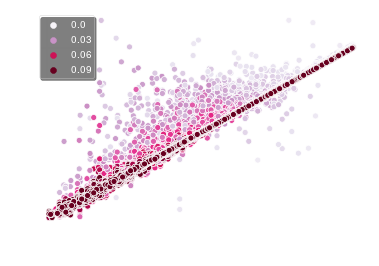

In [20]:
sns.scatterplot(x="dcoli", y="dcolf", hue=vcmi1, hue_norm=(0.0,0.08),palette='PuRd',data=df)
plt.show()

In [21]:
x = np.array([1, 0, 0])
y = np.array([0, 0, 1])
np.arctan2(x, y)

array([1.57079633, 0.        , 0.        ])

In [24]:
py_ang(x,y)

1.5707963267948966

$$vec_{collision} = [(vcmxi1 - vcmxi2),(vcmyi1 - vcmyi2),(vcmzi1 - vcmzi2)]$$
$$vec_{deflection} = [(vcmxf1 - vcmxf2),(vcmyf1 - vcmyf2),(vcmzf1 - vcmzf2)]$$
$$ angle = \angle vec_{collision},vec_{deflection}$$

In [25]:
vec_col = np.array((df.vcmxi1-df.vcmxi2, df.vcmyi1-df.vcmyi2, df.vcmzi1-df.vcmzi2))

In [26]:
np.shape(vec_col)

(3, 44532)

In [27]:
vec_def = np.array((df.vcmxf1-df.vcmxf2, df.vcmyf1-df.vcmyf2, df.vcmzf1-df.vcmzf2))

In [28]:
np.shape(vec_def)

(3, 44532)

In [32]:
ang = []
for i in range(np.shape(vec_def)[1]):
    ang.append(py_ang(vec_col[:,i], vec_def[:,i]))

In [33]:
angles=np.array(ang)*180.0/np.pi

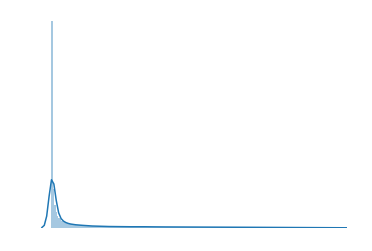

In [34]:
sns.distplot(angles,bins=200)
#plt.ylim(0,0.1)

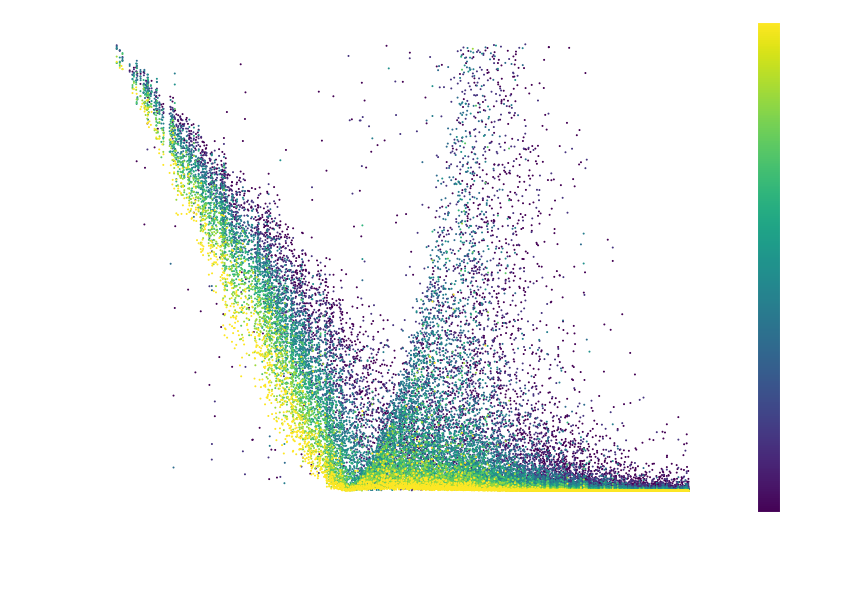

In [35]:
from matplotlib.colors import LogNorm
plt.style.use('helvet2dark')
plt.figure(dpi=150)
cm = plt.scatter(df.dcoli, angles, s=0.2, c=df.Temp, cmap='viridis',
                 norm=LogNorm())

plt.colorbar(cm, label='Temperature [K]')

plt.xlabel('Dcoli')
plt.ylabel('Deflection angle')
plt.tight_layout()
plt.show()

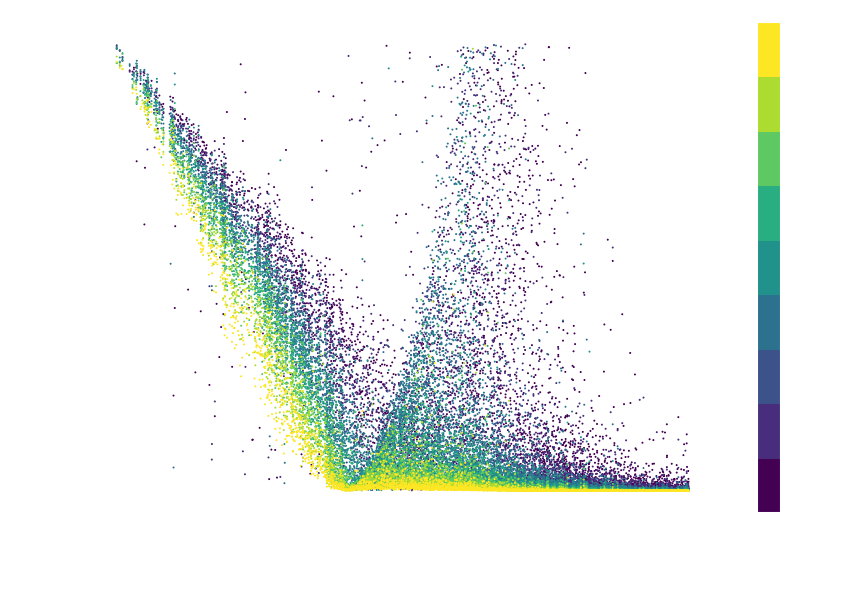

In [36]:

plt.figure(dpi=150)
cm = plt.scatter(df.dcoli, angles, s=0.2, c=df.Temp, cmap=plt.cm.get_cmap('viridis', len(df.Temp.unique())),
                 norm=LogNorm())

plt.colorbar(cm, label='Temperature [K]')

plt.xlabel('Dcoli')
plt.ylabel('Deflection angle')
plt.tight_layout()
plt.show()

In [37]:
eci = np.linalg.norm((df.vcmxi1,df.vcmyi1,df.vcmzi1), ord=2, axis=0) + np.linalg.norm((df.vcmxi2,df.vcmyi2,df.vcmzi2), ord=2, axis=0)
ecf = np.linalg.norm((df.vcmxf1,df.vcmyf1,df.vcmzf1), ord=2, axis=0) + np.linalg.norm((df.vcmxf2,df.vcmyf2,df.vcmzf2), ord=2, axis=0)

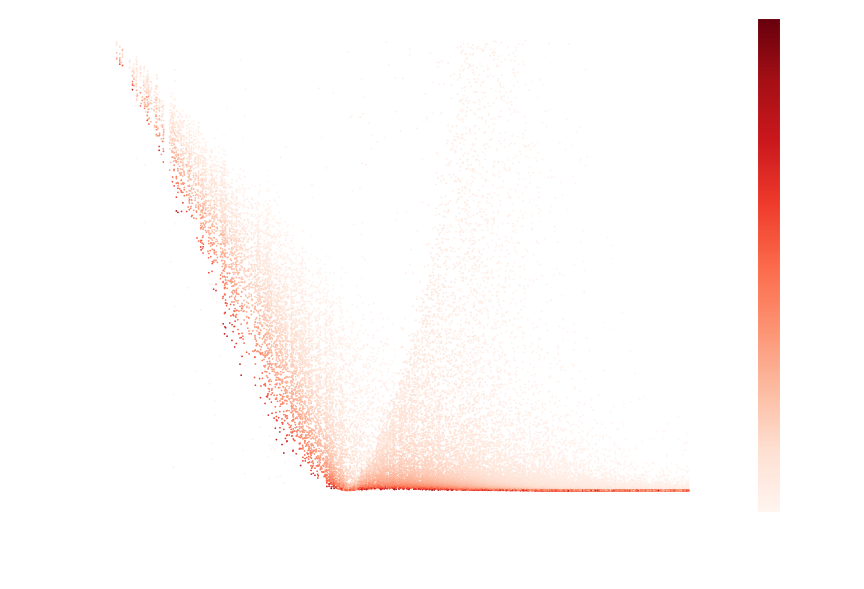

In [38]:
plt.figure(dpi=150)
cm = plt.scatter(df.dcoli, angles, s=0.1, c=eci, cmap='Reds')
plt.colorbar(cm, label='vci')
plt.xlabel('Dcoli')
plt.ylabel('Deflection angle')
plt.tight_layout()
plt.show()

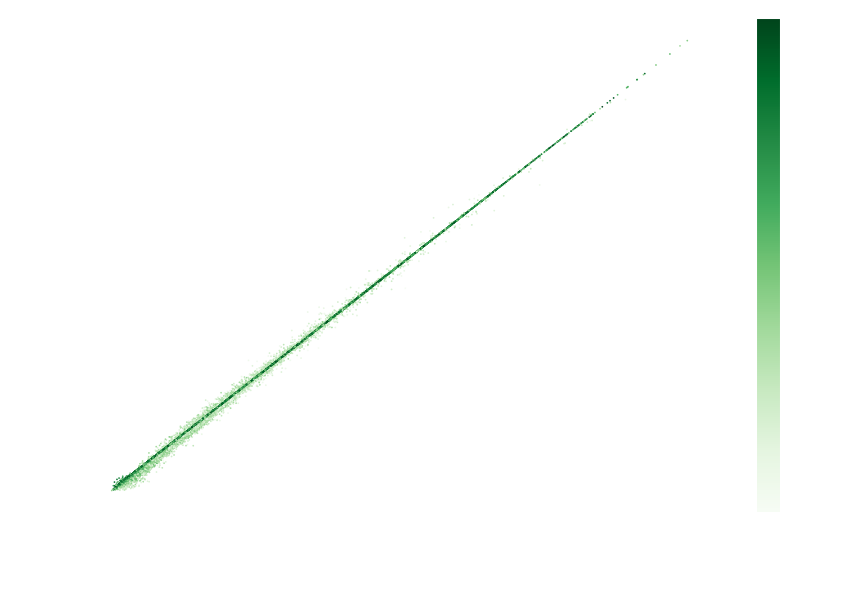

In [40]:
plt.figure(dpi=150)
cm = plt.scatter(eci, ecf, s=0.1, c=df.dcoli, cmap='Greens')
plt.colorbar(cm, label='dcoli')
plt.xlabel('eci')
plt.ylabel('ecf')
plt.tight_layout()
plt.show()

In [223]:
#df.to_hdf('qua.hdf5',key='df',complib='bzip2',complevel=9)

In [15]:
#np.linalg.norm((1,1,1), ord=2)

1.7320508075688772